In [11]:
from local_pc.Test_basemodel_functions import  *
from forecasting_functions import *
from os import *

# loading the files
path_to_folder = "D:\AI_time_series_repos\TS_code\Forecasting\LSTM\Hypersearch\local_stateless2\outputs"
makedirs(path.join(path_to_folder,"pictures"),exist_ok=True)
output_path_pictures = path.join(path_to_folder,"pictures")

error_0x1e84_name = "error_model1_sl_0x1e84e4d5cf1f463147f3e4d566167597423d7769.csv"
error_0x78a_name = "error_model1_sl_0x78a812ecd87a4b945e0d262aec41e0eb2b59fe1e.csv"
error_0xc3b_name = "error_model1_sl_0xc3b2f61a72e188cfd44483fce1bc11d6a628766d.csv"

error_0x1e84 = pd.read_csv(path.join(path_to_folder,error_0x1e84_name),index_col=0)
error_0x78a = pd.read_csv(path.join(path_to_folder,error_0x78a_name),index_col=0)
error_0xc3b = pd.read_csv(path.join(path_to_folder,error_0xc3b_name),index_col=0)

logbook_0x1e84_name = "logbook_model1_sl_0x1e84e4d5cf1f463147f3e4d566167597423d7769.csv"
logbook_0x78a_name = "logbook_model1_sl_0x78a812ecd87a4b945e0d262aec41e0eb2b59fe1e.csv"
logbook_0xc3b_name = "logbook_model1_sl_0xc3b2f61a72e188cfd44483fce1bc11d6a628766d.csv"

logbook_0x1e84 = pd.read_csv(path.join(path_to_folder,logbook_0x1e84_name),index_col=0)
logbook_0x78a = pd.read_csv(path.join(path_to_folder,logbook_0x78a_name),index_col=0)
logbook_0xc3b = pd.read_csv(path.join(path_to_folder,logbook_0xc3b_name),index_col=0)

training_result_0x1e84_name = "training_result_model1_sl_0x1e84e4d5cf1f463147f3e4d566167597423d7769.csv"
training_result_0x78a_name = "training_result_model1_sl_0x78a812ecd87a4b945e0d262aec41e0eb2b59fe1e.csv"
training_result_0xc3b_name = "training_result_model1_sl_0xc3b2f61a72e188cfd44483fce1bc11d6a628766d.csv"

training_result_0x1e84 = pd.read_csv(path.join(path_to_folder,training_result_0x1e84_name),index_col=0)
training_result_0x78a = pd.read_csv(path.join(path_to_folder,training_result_0x78a_name),index_col=0)
training_result_0xc3b = pd.read_csv(path.join(path_to_folder,training_result_0xc3b_name),index_col=0)



In [21]:
error_0xc3b.head(3)

,1_MSE,1_RMSE,1_NRMSE,1_MAE,1_MAPE,2_MSE,2_RMSE,2_NRMSE,2_MAE,2_MAPE,...,23_MSE,23_RMSE,23_NRMSE,23_MAE,23_MAPE,24_MSE,24_RMSE,24_NRMSE,24_MAE,24_MAPE
0,0.069096,0.262862,0.165114,0.145206,0.903787,0.069096,0.262862,0.165114,0.145206,0.903787,...,0.069096,0.262862,0.165114,0.145206,0.903787,0.069096,0.262862,0.165114,0.145206,0.903787
1,0.069096,0.262862,0.165114,0.145206,0.903787,0.069096,0.262862,0.165114,0.145206,0.903787,...,0.069096,0.262862,0.165114,0.145206,0.903787,0.069096,0.262862,0.165114,0.145206,0.903787
2,0.069096,0.262862,0.165114,0.145206,0.903787,0.069096,0.262862,0.165114,0.145206,0.903787,...,0.069096,0.262862,0.165114,0.145206,0.903787,0.069096,0.262862,0.165114,0.145206,0.903787


In [2]:

logbook_0xc3b.head(50)

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
units_LSTM,20,20,20,20,20,20,50,50,50,50,...,20,20,20,20,50,50,50,50,50,50
layers_LSTM,1,1,1,3,3,3,1,1,1,3,...,1,3,3,3,1,1,1,3,3,3
dropout_LSTM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
recurrent_dropout_LSTM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kernel_regularizer_LSTM,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
recurrent_regularizer_LSTM,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
bais_regularizer_LSTM,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
activity_regularizer_LSTM,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
units_DENSE,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
layers_DENSE,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
path_history = "D:\AI_time_series_repos\TS_code\Forecasting\\basemodel\data\DF_three_series.csv"
fullYeardata = pd.read_csv(path_history,index_col= "date",parse_dates= True)
names = fullYeardata.columns

In [4]:
def get_ID_numbers(name:str, number, DF: pd.DataFrame):
    newSerie = DF.loc[[name],:].squeeze()
    newSerie = pd.to_numeric(newSerie)
    settings = pd.to_numeric(DF.columns[newSerie.values == number])
    return settings

def get_all_error_values(setting_ID,metric:str, DF: pd.DataFrame):
    collection = np.array([])
    for id in setting_ID:
        col = DF[str(id)+"_"+metric].values
        collection = np.concatenate((collection,col), axis=None)
    return collection

In [23]:
def create_scatter_plot(name:str,numbers:list,metric:str,DF_log:pd.DataFrame,DF_error:pd.DataFrame, name_serie: str, colors:list = ['r','b','g']):
    axis = figure_layout(titel= metric+" "+ name,ylabel="Error")
    for i in range(len(numbers)):
        number = numbers[i]
        color = colors[i]
        settings_try = get_ID_numbers(name,number,DF_log)
        out = get_all_error_values(settings_try,metric,DF_error)
        print(len(out),end="")

        axis.scatter(np.arange(1,len(out)+1),out,c=color,label=number)
    plt.legend(loc="upper right")
    out_name: str = name_serie+"_"+metric+"_"+ name+".png"
    # using output_path_pictures as global variable
    plt.savefig(path.join(output_path_pictures,out_name), dpi=300, facecolor='w', edgecolor='w', orientation='portrait', format=None,
                    transparent=False, bbox_inches='tight', pad_inches=0.1, metadata=None)

def get_the_best_settings_MAE(DF_error: pd.DataFrame):
    collection_errors = []
    for col_name in DF_error.columns:
        if col_name[-3:] == "MAE":
            collection_errors.append(DF_error[col_name].sum())
    found_min = min(collection_errors)
    found_id = collection_errors.index(found_min) + 1
    return found_min, found_id

36
36
36
36
36
36
24
24
24
36
36
36
36
36
36
24
24
24
36
36
36
36
36
36
24
24
24


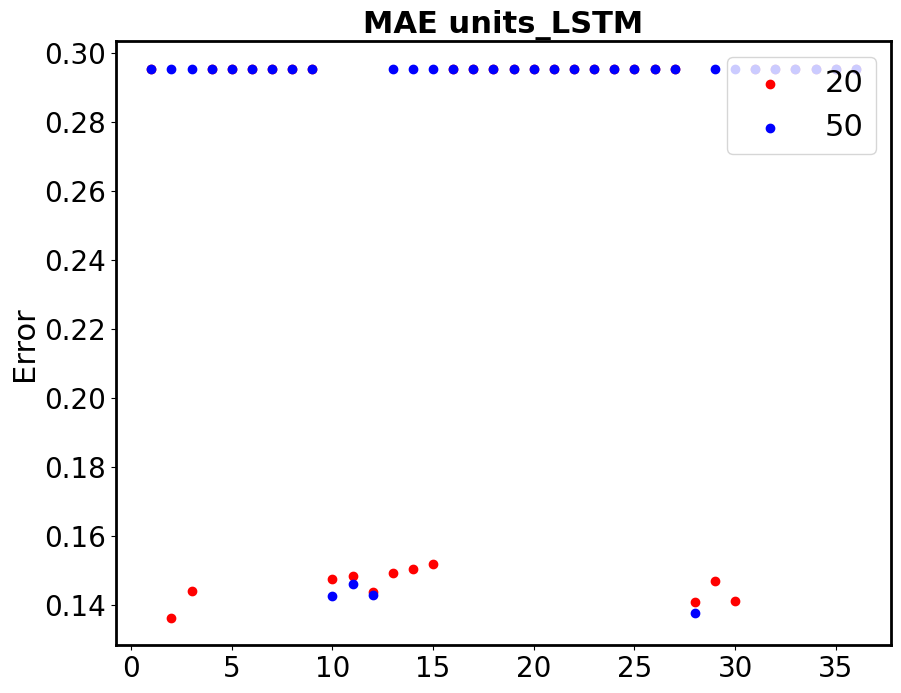

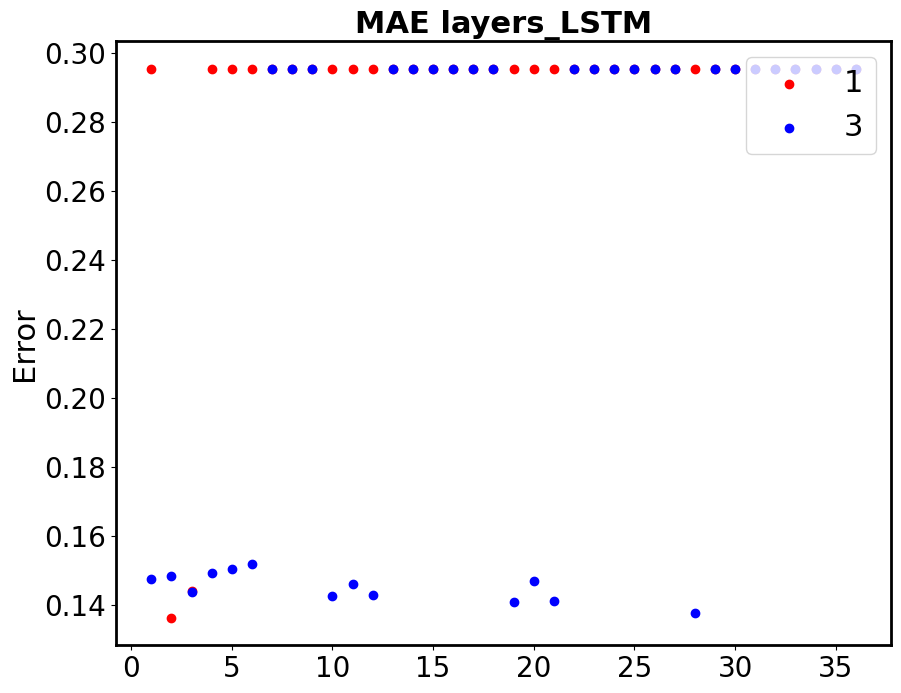

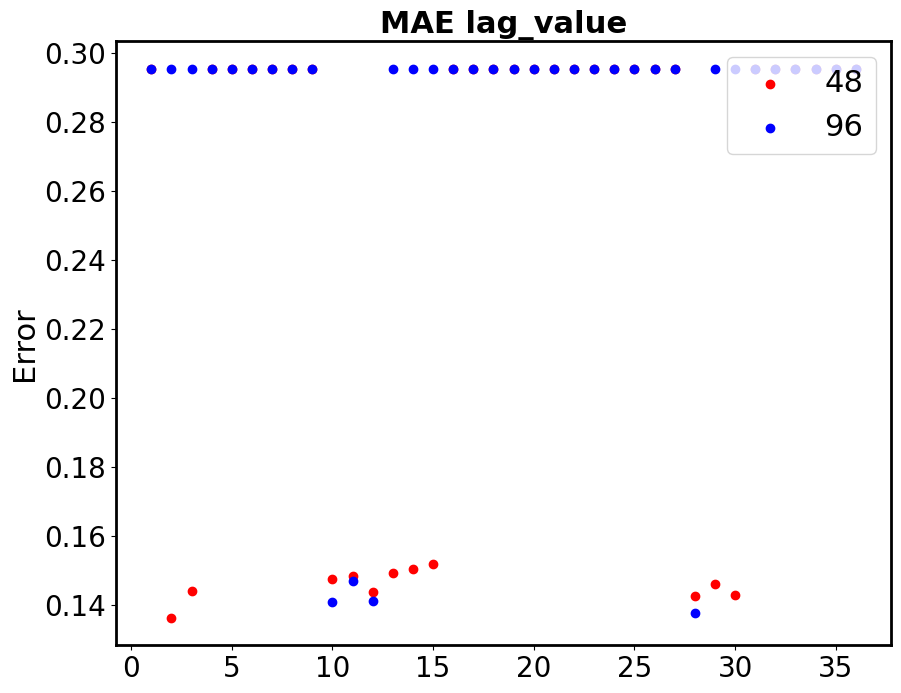

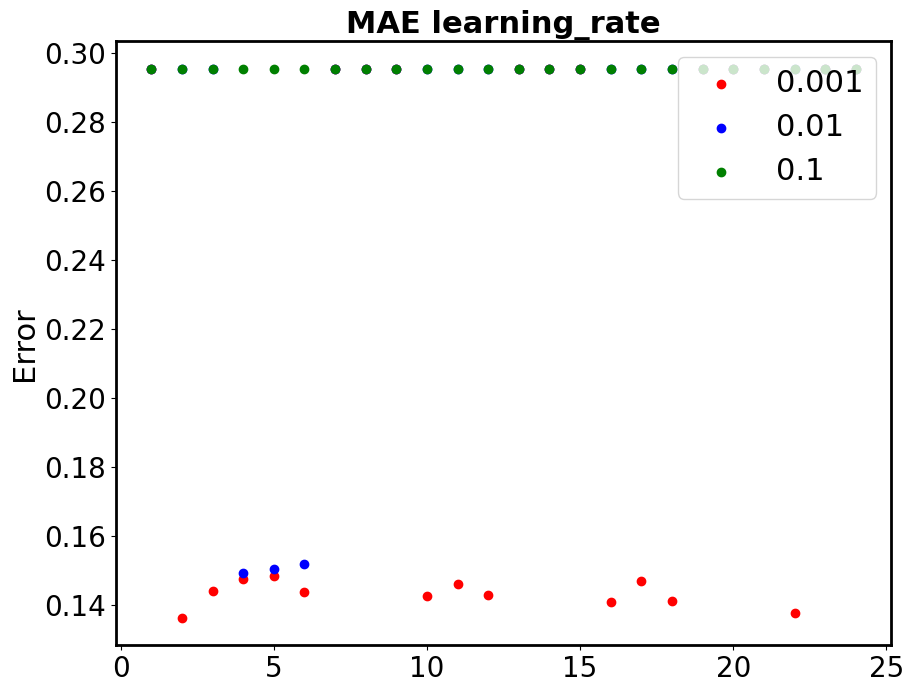

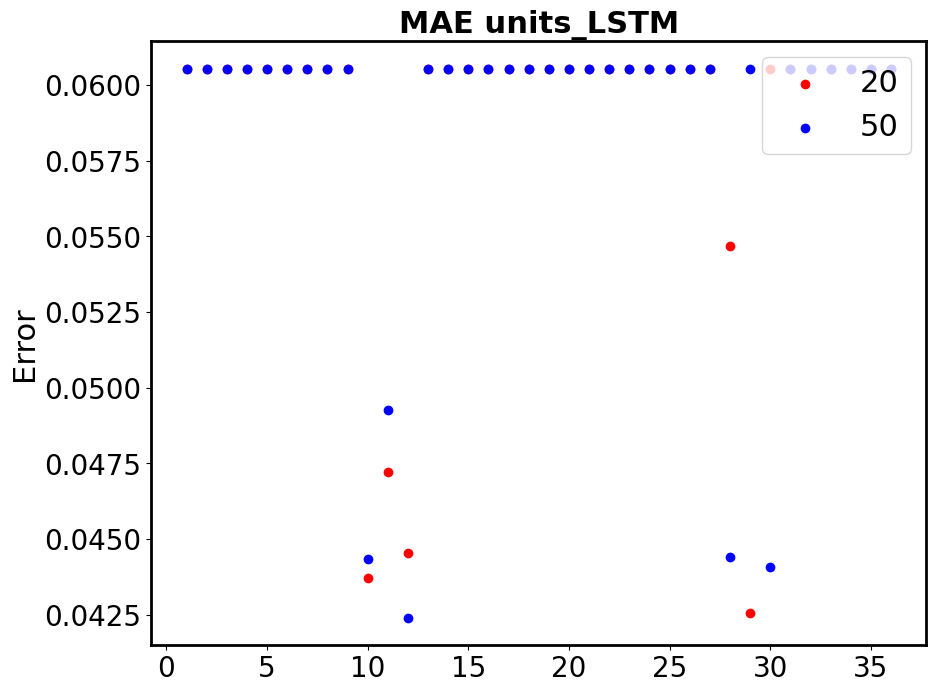

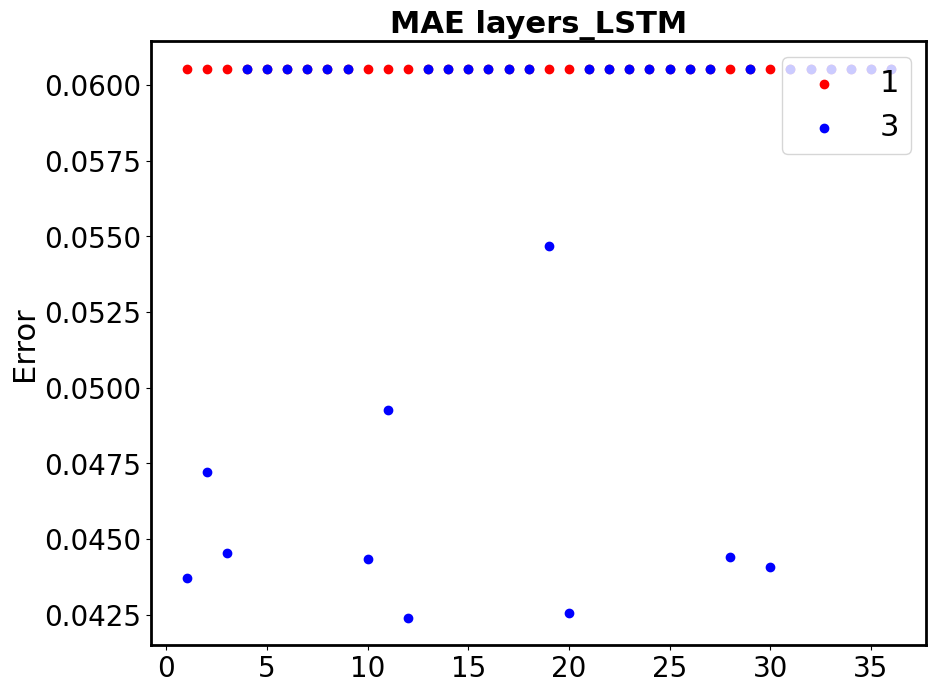

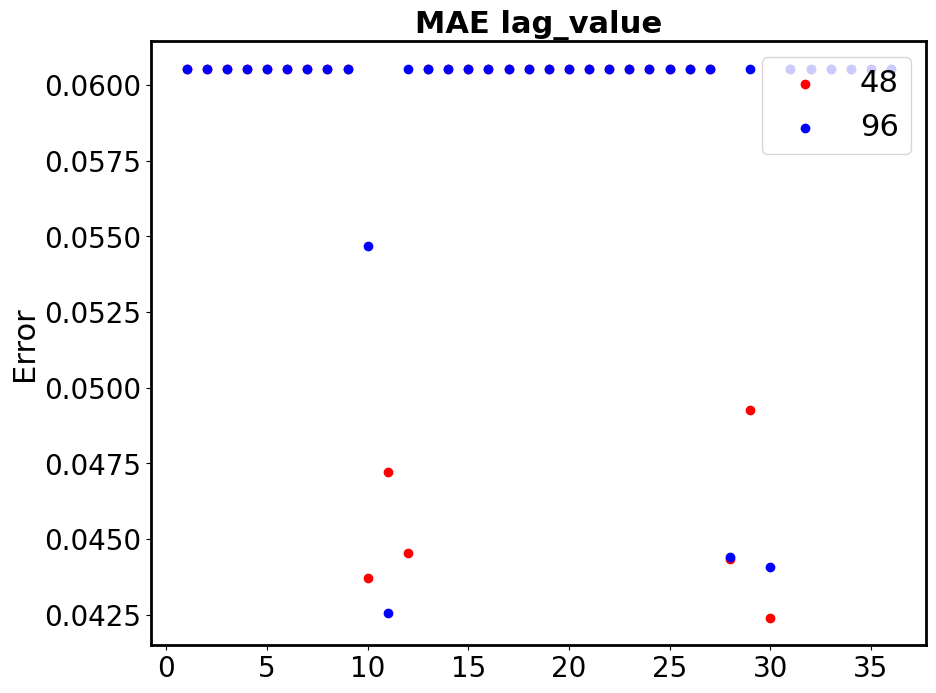

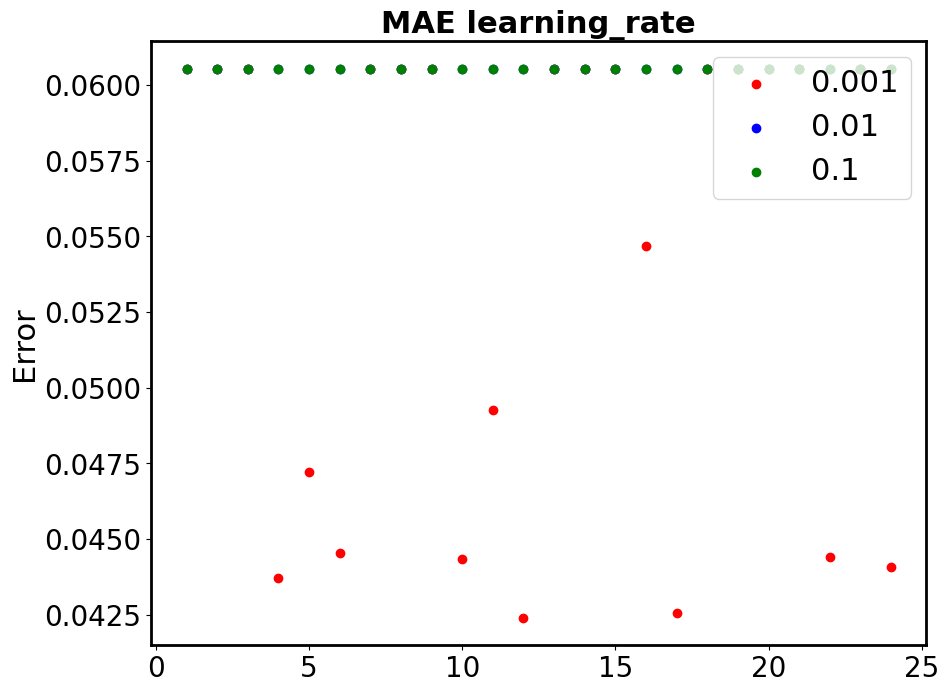

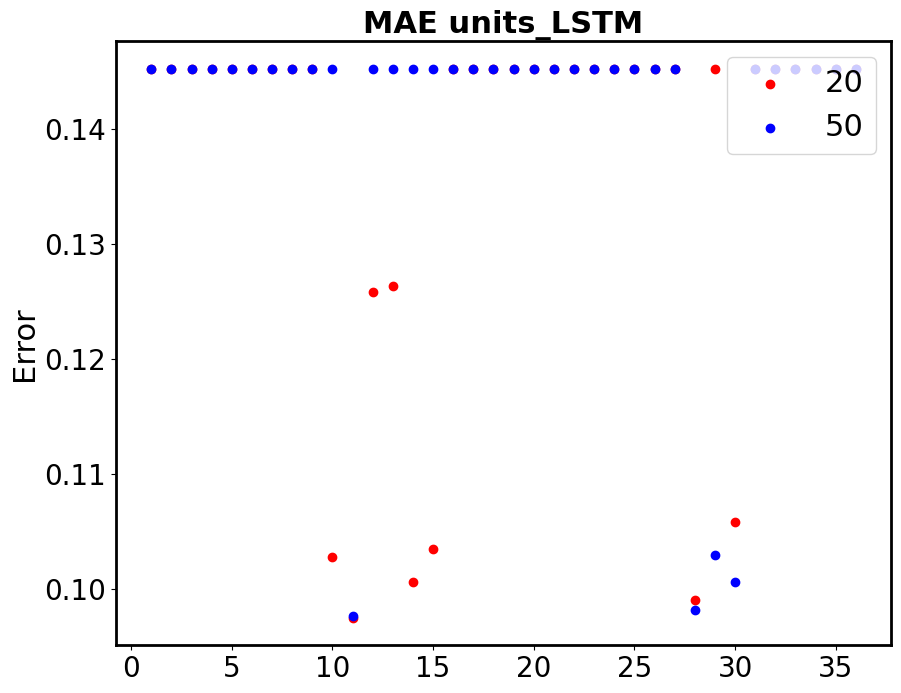

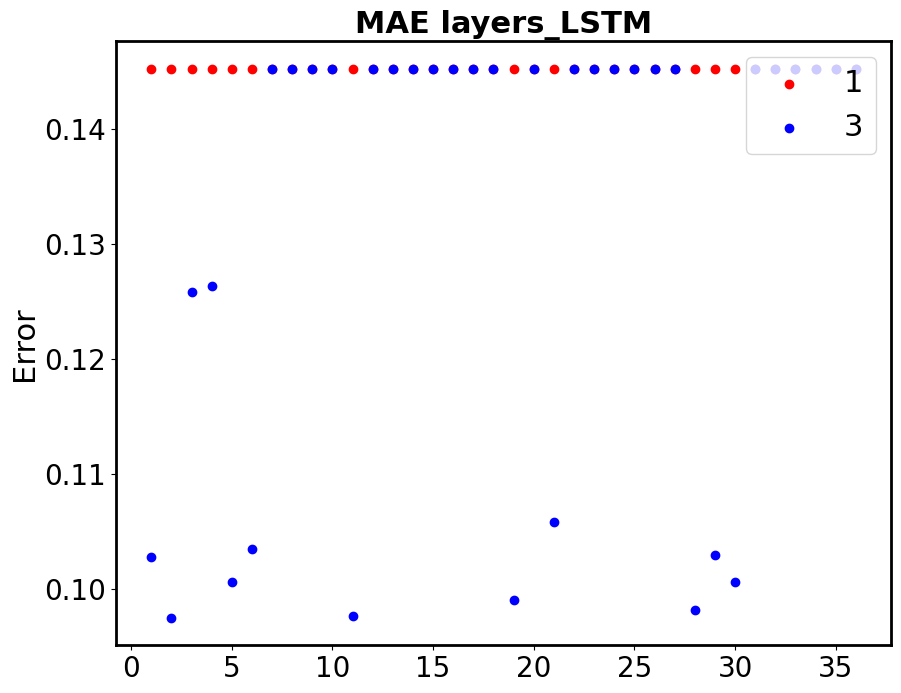

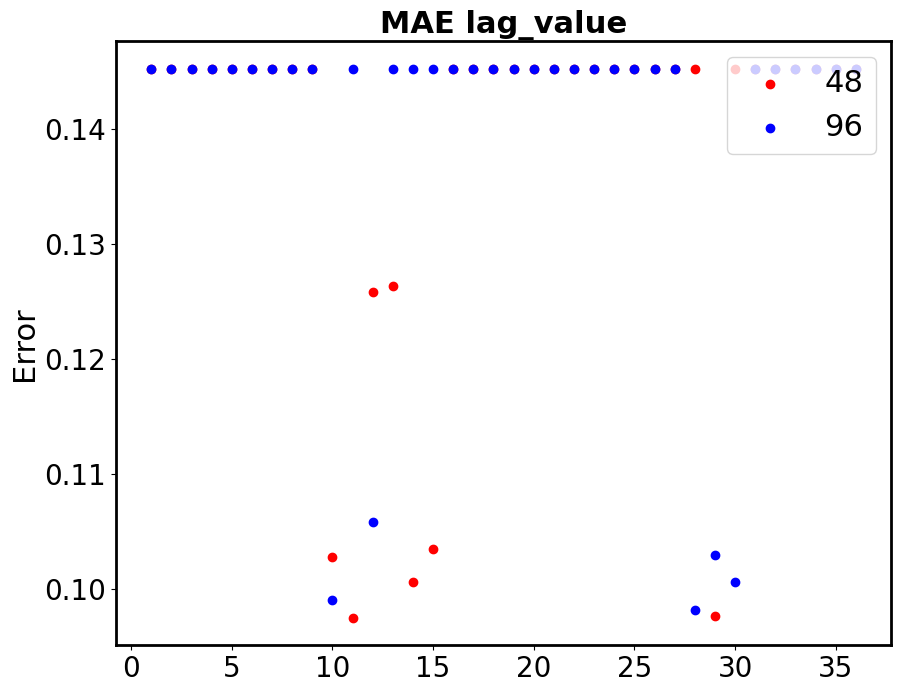

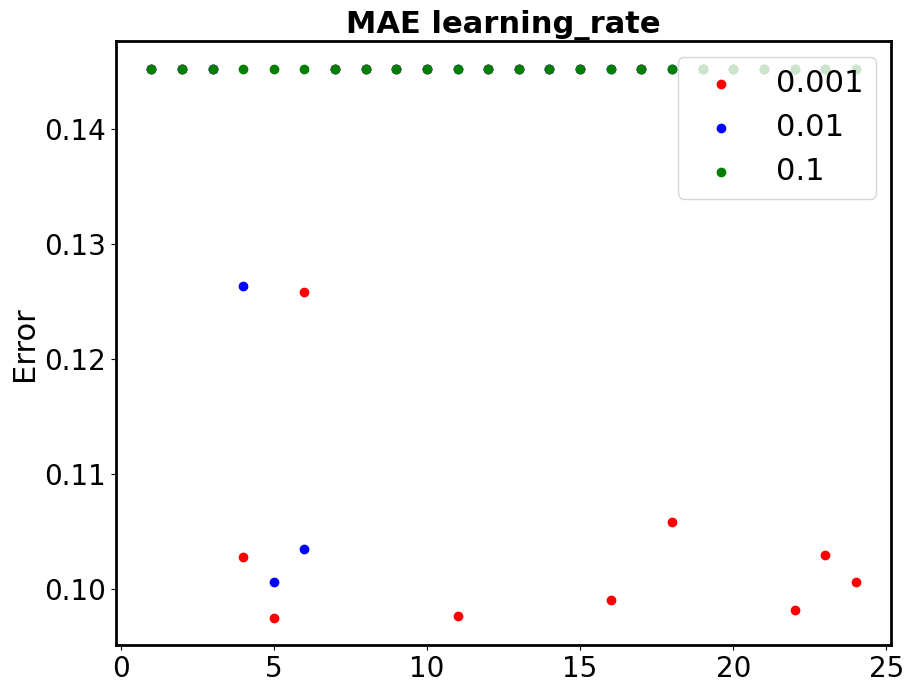

In [17]:
create_scatter_plot("units_LSTM",[20,50],"MAE",logbook_0x78a,error_0x78a,'0x78a812ecd87a4b945e0d262aec41e0eb2b59fe1e')
create_scatter_plot("layers_LSTM",[1,3],"MAE",logbook_0x78a,error_0x78a,'0x78a812ecd87a4b945e0d262aec41e0eb2b59fe1e')
create_scatter_plot("lag_value",[48,96],"MAE",logbook_0x78a,error_0x78a,'0x78a812ecd87a4b945e0d262aec41e0eb2b59fe1e')
create_scatter_plot("learning_rate",[0.001,0.01,0.1],"MAE",logbook_0x78a,error_0x78a,'0x78a812ecd87a4b945e0d262aec41e0eb2b59fe1e')


create_scatter_plot("units_LSTM",[20,50],"MAE",logbook_0x1e84,error_0x1e84,
'0x1e84e4d5cf1f463147f3e4d566167597423d7769')
create_scatter_plot("layers_LSTM",[1,3],"MAE",logbook_0x1e84,error_0x1e84,
'0x1e84e4d5cf1f463147f3e4d566167597423d7769')
create_scatter_plot("lag_value",[48,96],"MAE",logbook_0x1e84,error_0x1e84,
'0x1e84e4d5cf1f463147f3e4d566167597423d7769')
create_scatter_plot("learning_rate",[0.001,0.01,0.1],"MAE",logbook_0x1e84,error_0x1e84,
'0x1e84e4d5cf1f463147f3e4d566167597423d7769')


create_scatter_plot("units_LSTM",[20,50],"MAE",logbook_0xc3b,error_0xc3b,'0xc3b2f61a72e188cfd44483fce1bc11d6a628766d')
create_scatter_plot("layers_LSTM",[1,3],"MAE",logbook_0xc3b,error_0xc3b,'0xc3b2f61a72e188cfd44483fce1bc11d6a628766d')
create_scatter_plot("lag_value",[48,96],"MAE",logbook_0xc3b,error_0xc3b,'0xc3b2f61a72e188cfd44483fce1bc11d6a628766d')
create_scatter_plot("learning_rate",[0.001,0.01,0.1],"MAE",logbook_0xc3b,error_0xc3b,'0xc3b2f61a72e188cfd44483fce1bc11d6a628766d')


In [24]:
_,found_id = get_the_best_settings_MAE(error_0x78a)
logbook_0xc3b[str(found_id)]

units_LSTM                       20
layers_LSTM                       3
dropout_LSTM                      0
recurrent_dropout_LSTM            0
kernel_regularizer_LSTM        None
recurrent_regularizer_LSTM     None
bais_regularizer_LSTM          None
activity_regularizer_LSTM      None
units_DENSE                      50
layers_DENSE                      1
dropout_DENSE                     0
kernel_regularizer_DENSE       None
bais_regularizer_DENSE         None
activity_regularizer_DENSE     None
lag_value                        96
nb_epoch                          1
activation                     relu
batch_size_parameter             48
learning_rate                 0.001
patience                          0
shuffle                        True
repeat                            3
Name: 16, dtype: object

120